In [1]:
require(data.table)
require(pbapply)
pboptions(type="timer")
require(ggplot2)
require(cowplot)

Loading required package: data.table

Loading required package: pbapply

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
root_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726"

## Read dots

In [3]:
dots_data = readRDS(file.path(root_path, "dots_data.rds"))

# SNR vs SNR2

### Pearson's Correlation Coefficient

In [4]:
# Using all dots
dots_data[is.finite(SNR2) & is.finite(SNR),
          .(pcor=cor(SNR, SNR2, use="pairwise.complete.obs", method="pearson")),
          by=c("magnification", "image_type")]

magnification,image_type,pcor
<chr>,<chr>,<dbl>
20x,dw,0.87041687
20x,raw,0.89783658
60x,dw,0.00924694
60x,raw,0.85883167


In [5]:
# Discarding outliers (i.e., SNR >= 20)
dots_data[is.finite(SNR2) & is.finite(SNR) & SNR <= 20,
          .(pcor=cor(SNR, SNR2, use="pairwise.complete.obs", method="pearson")),
          by=c("magnification", "image_type")]

magnification,image_type,pcor
<chr>,<chr>,<dbl>
20x,dw,0.9125846
20x,raw,0.8971331
60x,dw,0.7441577
60x,raw,0.8400136


### Scatterplots

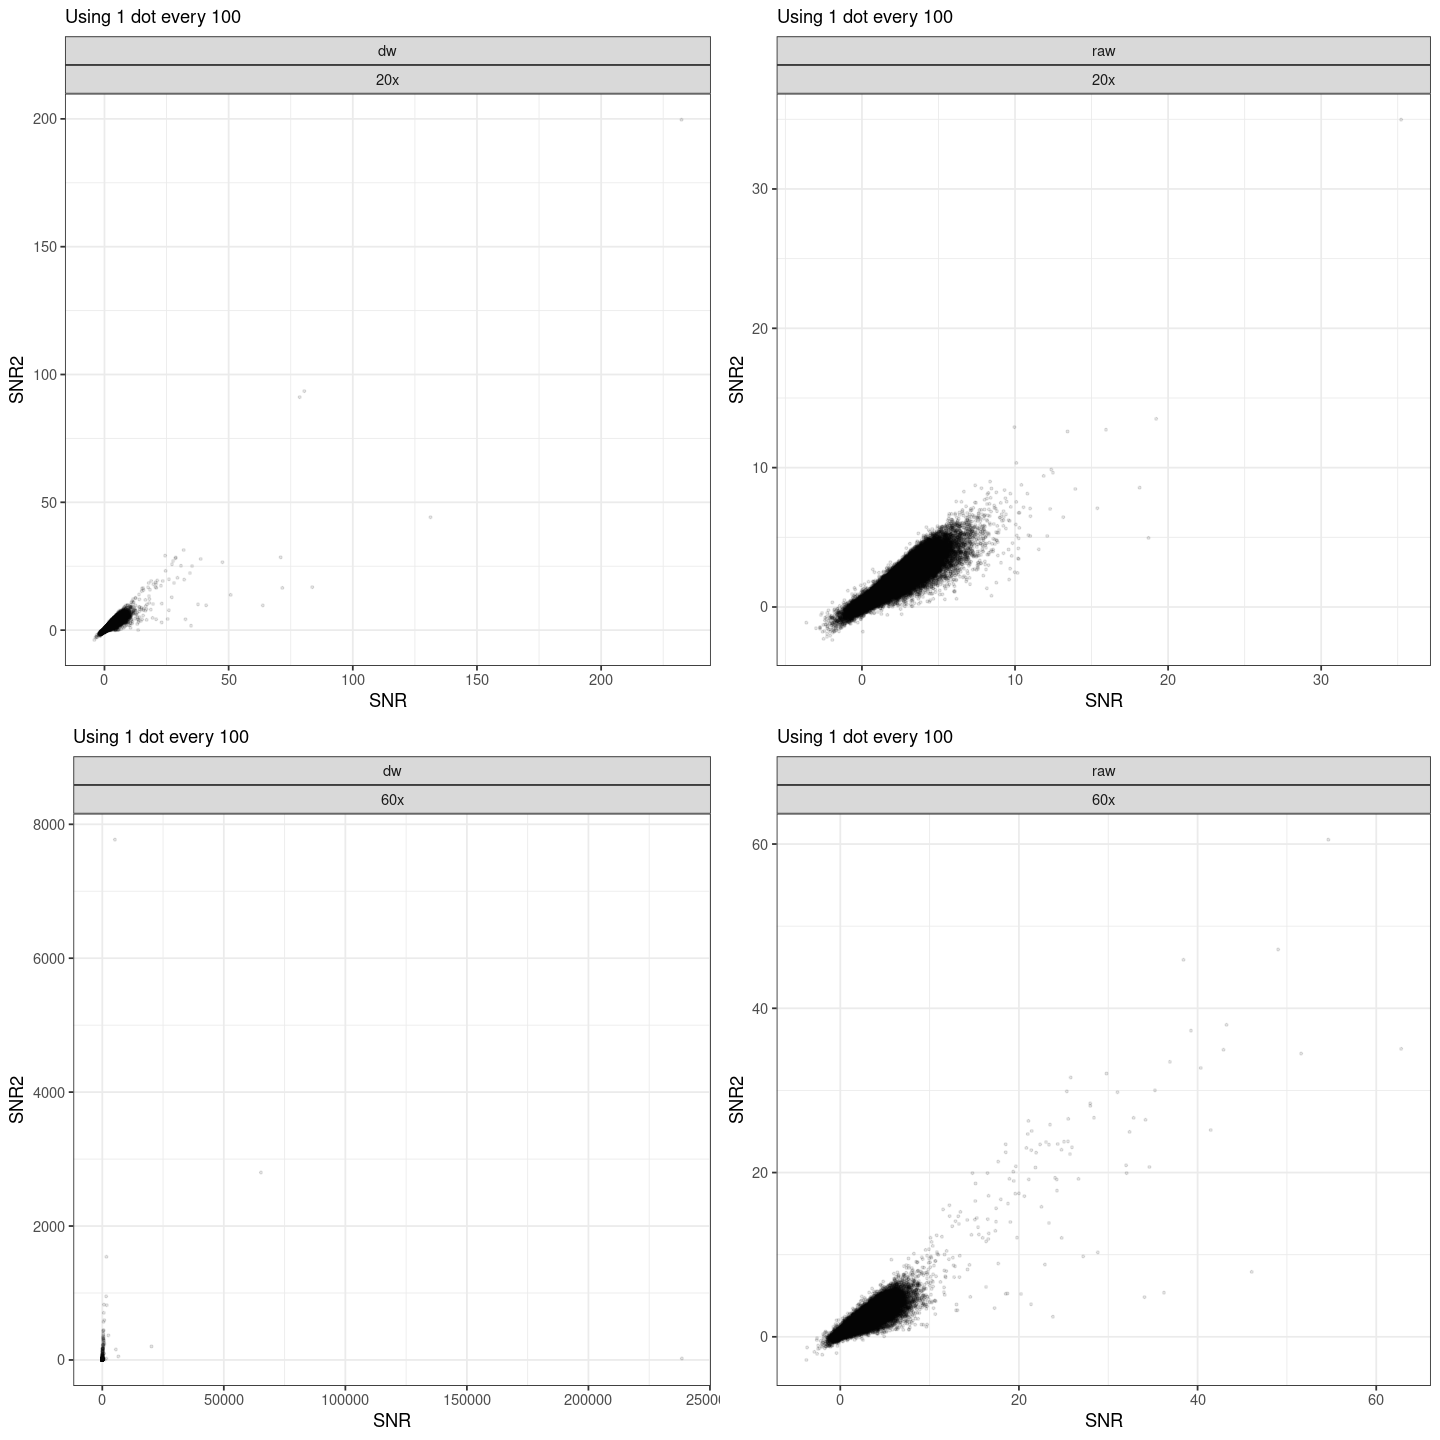

In [6]:
# Selecting only for finite SNR and SNR2
ddata = dots_data[is.finite(SNR2) & is.finite(SNR)]
plist = by(ddata, ddata[, paste0(magnification, "_", image_type)], function(pdata) {
    p1 = ggplot(pdata[seq(1, nrow(pdata), by=100)],
                aes(x=SNR, y=SNR2)) + geom_point(alpha=.1, size=.5) +
        facet_wrap(~image_type~magnification, scales="free") +
        labs(subtitle="Using 1 dot every 100") + theme_bw()
})
options(repr.plot.width=12, repr.plot.height=12)
plot_grid(plotlist=plist, nrow=2)

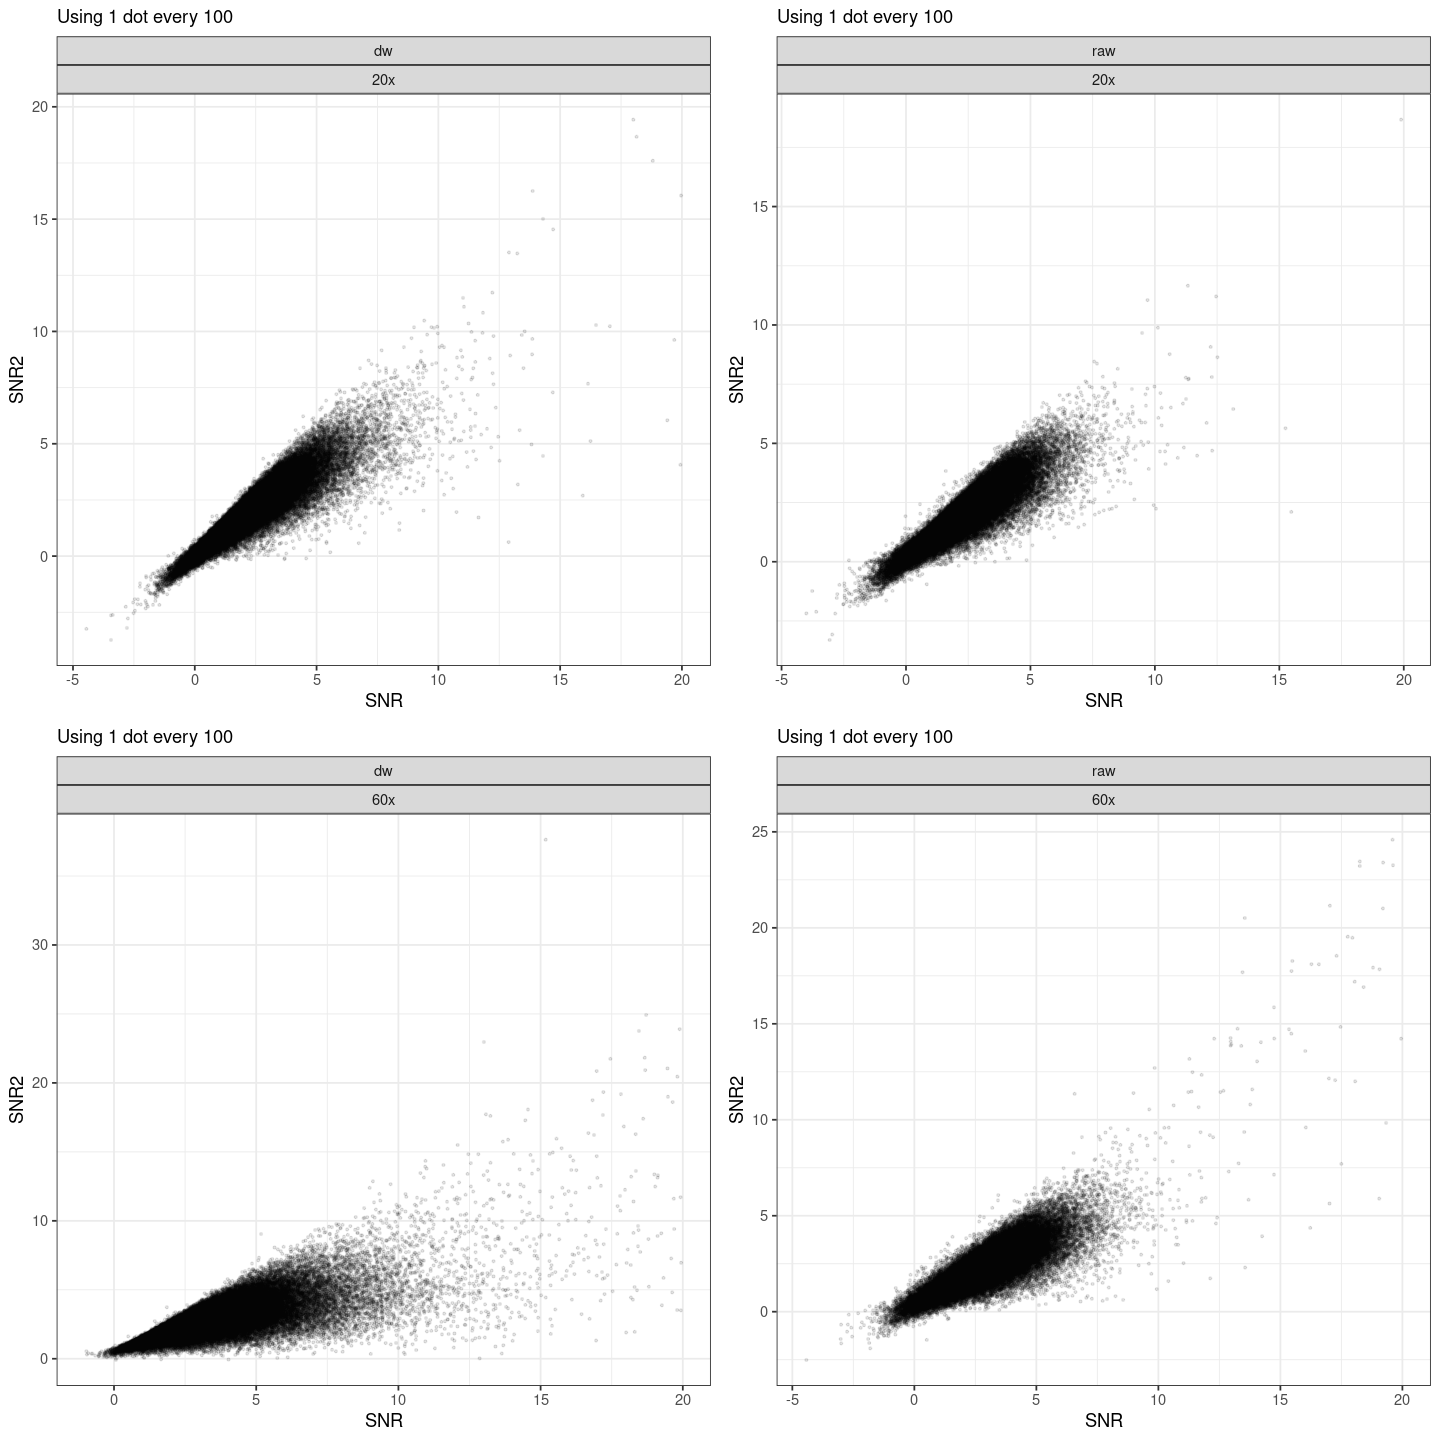

In [7]:
# Selecting for finite SNR and SNR2 & discarding outliers (i.e., SNR > 20 are removed)
ddata = dots_data[is.finite(SNR2) & is.finite(SNR) & SNR <= 20]
plist = by(ddata, ddata[, paste0(magnification, "_", image_type)], function(pdata) {
    p1 = ggplot(pdata[seq(1, nrow(pdata), by=100)],
                aes(x=SNR, y=SNR2)) + geom_point(alpha=.1, size=.5) +
        facet_wrap(~image_type~magnification, scales="free") +
        labs(subtitle="Using 1 dot every 100") + theme_bw()
})
options(repr.plot.width=12, repr.plot.height=12)
plot_grid(plotlist=plist, nrow=2)

# Value vs Value2

### Perason's Correlation Coefficient

In [9]:
# Using all dots
dots_data[, .(pcor=cor(Value, Value2, use="pairwise.complete.obs", method="pearson")),
          by=c("magnification", "image_type")]

magnification,image_type,pcor
<chr>,<chr>,<dbl>
20x,dw,0.9964551
20x,raw,1.0000000
60x,dw,0.9989239
60x,raw,1.0000000
